## Introdução

Este projeto visa realizar uma coleta diária das principais manchetes das categorias do site do G1, de forma a analisar a distribuição de notícias por tema.

In [1]:
# Importação de bibliotecas

import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import time

In [2]:
# Definição de assuntos e URLs

categorias = {
    'Política': 'https://g1.globo.com/politica/',
    'Economia': 'https://g1.globo.com/economia/',
    'Mundo': 'https://g1.globo.com/mundo/',
    'Tecnologia': 'https://g1.globo.com/tecnologia/',
    'Esportes': 'https://g1.globo.com/esporte/',
    'Saúde': 'https://g1.globo.com/saude/',
    'Cultura': 'https://g1.globo.com/pop-arte/'
}

In [4]:
# Coleta de dados

dados = []
data_coleta = datetime.now().strftime('%Y-%m-%d')

for categoria, url in categorias.items():
    print(f'Coletando {categoria}...')
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    noticias = soup.find_all('a', class_='feed-post-link')

    for noticia in noticias:
        titulo = noticia.get_text(strip=True)
        if titulo:
            dados.append({
                'Data_Coleta': data_coleta,
                'Categoria': categoria,
                'Titulo': titulo
            })
    time.sleep(1)  # para garantir a leitura pelo tempo do servidor

Coletando Política...
Coletando Economia...
Coletando Mundo...
Coletando Tecnologia...
Coletando Esportes...
Coletando Saúde...
Coletando Cultura...


In [5]:
# Limpeza de dados e criação do DataFrame

df = pd.DataFrame(dados)
df.drop_duplicates(inplace=True)
df = df[df['Titulo'].str.strip() != '']
df.reset_index(drop=True, inplace=True)
df.head()

,Data_Coleta,Categoria,Titulo
0,2025-05-12,Política,PGR defende que STF receba queixa-crime de Gle...
1,2025-05-12,Política,Importação de produtos chineses pelo Brasil cr...
2,2025-05-12,Política,Oposição apresenta pedido de criação da CPI do...
3,2025-05-12,Política,"Homicídios caíram 1,4% no Brasil em 2023, indi..."
4,2025-05-12,Política,Boulos é cotado para assumir ministério em ref...


In [6]:
# Quantidade de notícias por assunto (resumo)

contagem = df['Categoria'].value_counts()
print(contagem)

Categoria
Política      10
Mundo         10
Tecnologia    10
Saúde         10
Cultura       10
Economia       7
Name: count, dtype: int64


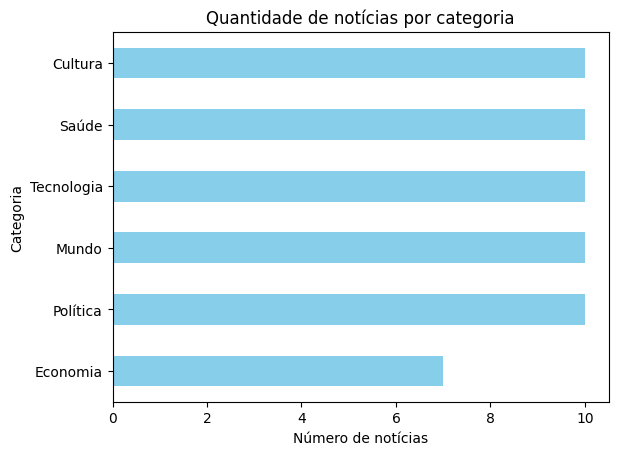

In [7]:
# Visualização da distribuição

contagem.sort_values().plot(kind='barh', color='skyblue')
plt.title('Quantidade de notícias por categoria')
plt.xlabel('Número de notícias')
plt.ylabel('Categoria')
plt.show()

#### Problema:
Note que a base de dados é diminuta, pois conta apenas com os dados relativos a 1 dia de análise das URLs do G1. Os próximos passos deste projeto circulam em torno de analisar o site por vários dias e armazenar as informações em um arquivo para aumentar a base de dados, possibilitando uma análise mais profunda.

In [8]:
# Exportação dos dados

df.to_csv('g1_noticias_exemplo.csv', index=False)
df.to_excel('g1_noticias_exemplo.xlsx', index=False)
print('Arquivos salvos: g1_noticias_exemplo.csv e g1_noticias_exemplo.xlsx')

Arquivos salvos: g1_noticias_exemplo.csv e g1_noticias_exemplo.xlsx


## Conclusão parcial

Foi realizada a coleta automatizada das manchetes das principais categorias do G1, a limpeza dos dados e o resumo gráfico da distribuição. A etapa seguinte do projeto será repetir o processo em diferentes dias para analisar variações e tendências ao longo do tempo.